**COURSE PROYECT**

***Bussiness analysis***

-------------------------------------------------------------------------------------------------------------------------------

**Project Description**

***Context*** 

You have been offered an internship in the analytical department of Y.Afisha. Your first task is to help optimize marketing expenses.

***What you have:***
   
-Server logs with data on visits to Y.Afisha from January 2017 to December 2018.

-A file containing orders during this period.

-Marketing expense statistics.

***What you will analyze:***

-How customers use the service.

-When they start making purchases.

-How much revenue each customer brings to the company.

-When revenue covers the customer acquisition cost.

-------------------------------------------------------------------------------------------------------------------------------


**Data Description**

**Dataset:** visits

*Uid:* Unique user identifier.

*Device:* User's device.

*Start Ts:* Session start date and time.

*End Ts:* Session end date and time.

*Source Id:* Identifier of the advertising source the user came from.

All dates in this table are in the YYYY-MM-DD format.

-------------------------------------------------------------------------------------------------------------------------------

**Dataset:** orders

*Uid:* Unique identifier of the user placing an order.

*Buy Ts:* Order date and time.

*Revenue:* Y.Afisha's revenue from this order.

-------------------------------------------------------------------------------------------------------------------------------

**Dataset:** costs

*source_id:* Identifier of the advertising source.

*dt:* Date.

*costs:* Expenses for this advertising source on this day


**Steps to complete the proyect**

***Step 1. Download the datasets and prepare them for the analysis***

In [5]:
#Load libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Download datasets
visits= pd.read_csv(r"C:\Users\user\Downloads\PROYECTOS TT\visits_log_us (1).csv")
orders = pd.read_csv(r"C:\Users\user\Downloads\PROYECTOS TT\orders_log_us (1).csv")
costs = pd.read_csv(r"C:\Users\user\Downloads\PROYECTOS TT\costs_us (1).csv")


In [7]:
#Check datasets
visits.info(memory_usage='deep')
print()
orders.info(memory_usage='deep')
print()
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 

In [8]:
# Check the values in the 'Device' column
visits['Device'].value_counts()

Device
desktop    262567
touch       96833
Name: count, dtype: int64

In [9]:
# Change the data type of the 'Device' column from object to category to save memory
visits['Device'] = visits['Device'].astype('category')


In [10]:
#Verify the changes
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   Device     359400 non-null  category
 1   End Ts     359400 non-null  object  
 2   Source Id  359400 non-null  int64   
 3   Start Ts   359400 non-null  object  
 4   Uid        359400 non-null  uint64  
dtypes: category(1), int64(1), object(2), uint64(1)
memory usage: 57.9 MB


In [11]:
# Convert columns to datetime, allowing different formats
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format='mixed')
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format='mixed')
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format='mixed')
costs['dt'] = pd.to_datetime(costs['dt'], format='mixed')



In [12]:
#Verify the changes 
visits.info(memory_usage='deep')
print()
orders.info(memory_usage='deep')
print()
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 t

***Step 2. Create reports and calculate metrics.***

**Visits**

Average DAU: 907.9917582417582
Average WAU: 5716.245283018868
Average MAU: 23228.416666666668


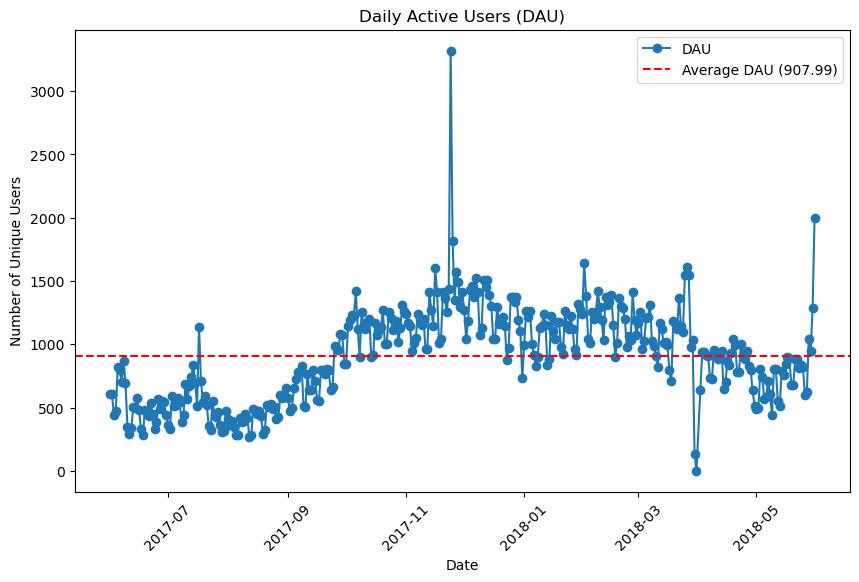

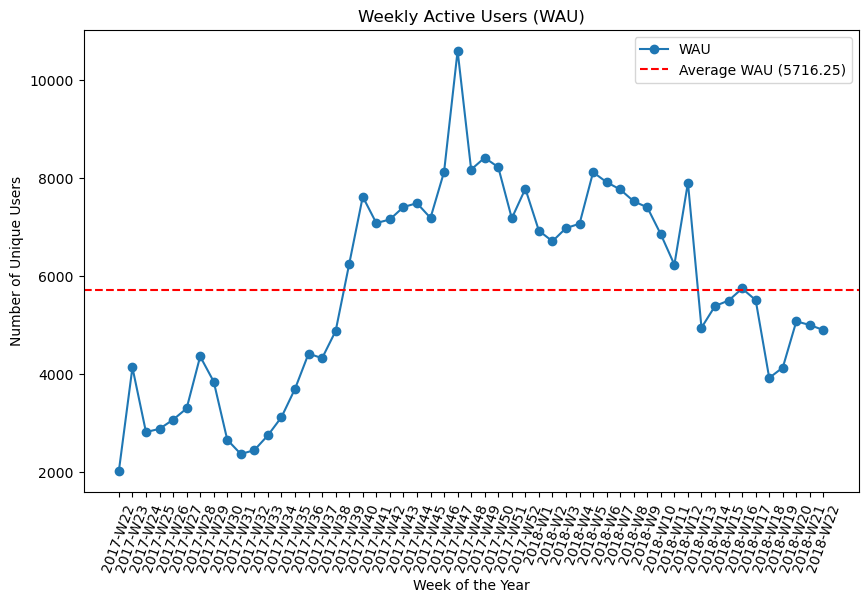

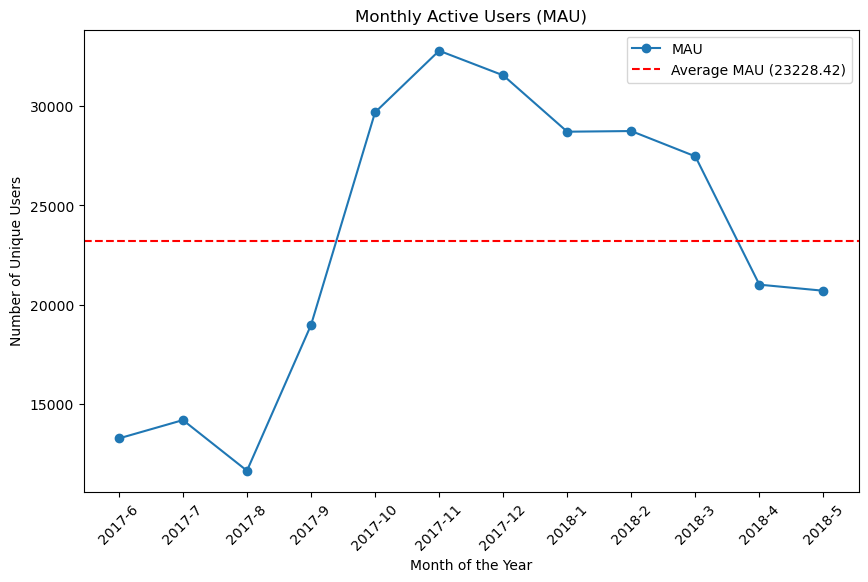

In [14]:
# How many people use it daily, weekly, and monthly?

visits['session_year'] = visits['Start Ts'].dt.year
visits['session_month'] = visits['Start Ts'].dt.month
visits['session_week'] = visits['Start Ts'].dt.isocalendar().week
visits['session_date'] = visits['Start Ts'].dt.date

# Calculate the number of unique daily, weekly, and monthly users
dau = visits.groupby('session_date').agg({'Uid': 'nunique'}).reset_index()
wau = visits.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).reset_index()
mau = visits.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).reset_index()

mean_dau = dau['Uid'].mean()
mean_wau = wau['Uid'].mean()
mean_mau = mau['Uid'].mean()

print(f"Average DAU: {mean_dau}")
print(f"Average WAU: {mean_wau}")
print(f"Average MAU: {mean_mau}")

# Create the DAU chart
plt.figure(figsize=(10, 6))
plt.plot(dau['session_date'], dau['Uid'], marker='o', label='DAU')
plt.axhline(mean_dau, color='r', linestyle='--', label=f'Average DAU ({mean_dau:.2f})')
plt.title('Daily Active Users (DAU)')
plt.xlabel('Date')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Create the WAU chart
plt.figure(figsize=(10, 6))
plt.plot(wau['session_year'].astype(str) + '-W' + wau['session_week'].astype(str), wau['Uid'], marker='o', label='WAU')
plt.axhline(mean_wau, color='r', linestyle='--', label=f'Average WAU ({mean_wau:.2f})')
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=70)
plt.legend()
plt.show()

# Create the MAU chart
plt.figure(figsize=(10, 6))
plt.plot(mau['session_year'].astype(str) + '-' + mau['session_month'].astype(str), mau['Uid'], marker='o', label='MAU')
plt.axhline(mean_mau, color='r', linestyle='--', label=f'Average MAU ({mean_mau:.2f})')
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.legend()
plt.show()


*Observation:*

DAU, WAU, and MAU trends show a clear growth pattern followed by a decline. The DAU graph indicates significant fluctuations, with noticeable peaks and drops, suggesting periodic spikes in user activity. The WAU trend follows a similar pattern, peaking towards the end of 2017 before stabilizing at a lower level. The MAU graph reveals a rapid increase in active users during mid-2017, reaching a peak in late 2017, and then gradually decreasing.

This pattern suggests that the platform experienced a period of strong user growth, possibly driven by marketing efforts or seasonal demand, followed by a decline, which could be due to user churn, reduced engagement, or external factors. It may be valuable to investigate the reasons behind the drop and explore retention strategies to maintain long-term engagement.

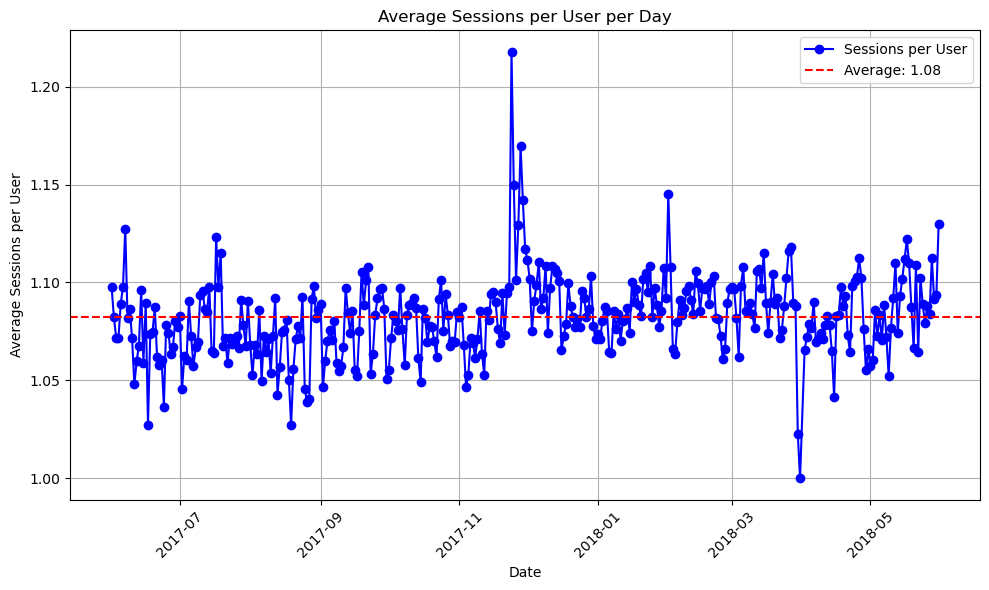

In [16]:
# How many sessions are there per day? (A user can have more than one session)
# Grouping data to show the number of users per day
sessions_per_user = visits.groupby('session_date').agg(
    {'Uid': ['count', 'nunique']}
)

# Dividing the number of sessions by the number of users for a given period, in this case, a day.
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users'] 
)

# Calculate the average sessions per user
average_sessions_per_user = sessions_per_user['sessions_per_user'].mean()

# Plot
plt.figure(figsize=(10, 6))

# Line chart for sessions per user per day
plt.plot(sessions_per_user.index, sessions_per_user['sessions_per_user'], 
         marker='o', linestyle='-', color='blue', label='Sessions per User')

# Horizontal line for the average sessions per user
plt.axhline(y=average_sessions_per_user, color='red', linestyle='--', 
            label=f'Average: {average_sessions_per_user:.2f}')

plt.title('Average Sessions per User per Day')
plt.xlabel('Date')
plt.ylabel('Average Sessions per User')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


*Observation:*

The graph shows the average number of sessions per user per day over time. The overall trend fluctuates around an average of 1.08 sessions per user, with occasional spikes and dips. A significant peak is observed around late 2017, which may indicate a period of increased engagement or an anomaly in the data. Similarly, some sharp drops suggest days when users had unusually low session activity.

This analysis suggests that, on most days, users tend to have close to one session per day, with only minor variations. Understanding the cause of peaks and dips—whether due to seasonality, marketing efforts, or external factors—could provide valuable insights for optimizing user engagement.

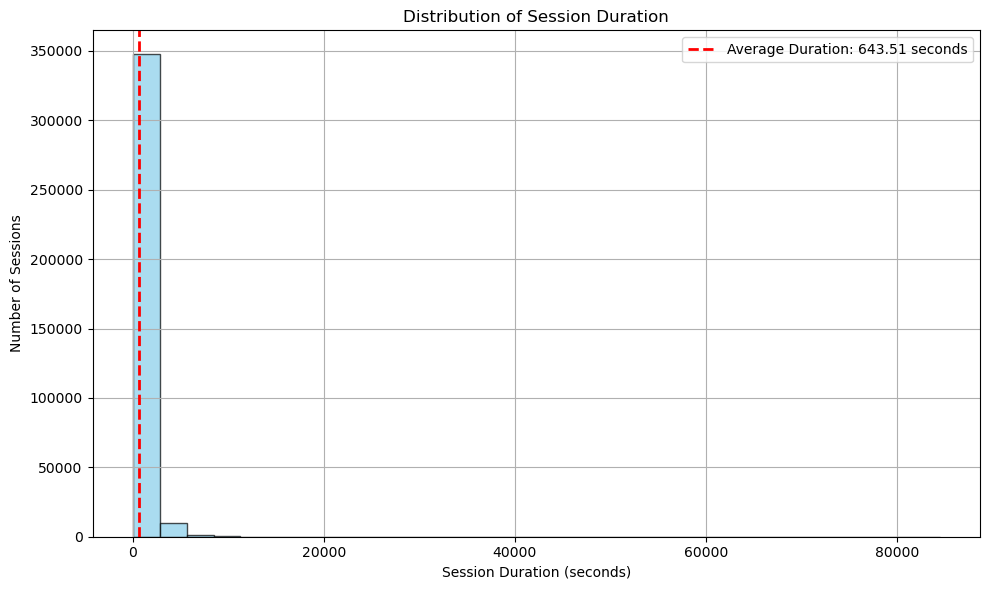

In [18]:
# What is the duration of each session?  
# Calculate the session duration in seconds  
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds  

# Calculate the average session duration  
mean_session_duration = visits['session_duration_sec'].mean()  

# Plot the distribution of session durations  
plt.figure(figsize=(10, 6))  
plt.hist(visits['session_duration_sec'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)  

# Vertical line to indicate the average duration  
plt.axvline(mean_session_duration, color='red', linestyle='--', linewidth=2, label=f'Average Duration: {mean_session_duration:.2f} seconds')  

plt.title('Distribution of Session Duration')  
plt.xlabel('Session Duration (seconds)')  
plt.ylabel('Number of Sessions')  
plt.legend()  
plt.grid(True)  
plt.tight_layout()  
plt.show()  


*Observation:*

The histogram shows a highly skewed distribution of session durations, with most sessions concentrated in the lower range. The average session duration is 643.51 seconds (approximately 10.7 minutes), but the presence of extreme values (outliers) significantly influences this metric. The long tail of the distribution suggests that while most users have short sessions, a few sessions last much longer. A more detailed analysis, such as using the median or percentiles, could provide better insights into typical session durations without being affected by extreme values.

In [20]:
# How often do users return?  
# Determine the sticky factor. This metric indicates audience loyalty and how frequently users return to the application.  
sticky_wau = (mean_dau / mean_wau) * 100  
sticky_mau = (mean_dau / mean_mau) * 100  

print('Percentage of users returning weekly:', int(sticky_wau), '%')  
print('Percentage of users returning monthly:', int(sticky_mau), '%')  


Percentage of users returning weekly: 15 %
Percentage of users returning monthly: 3 %


*Observation:*

The results indicate that only 15% of users return weekly, while just 3% return monthly. This suggests a low retention rate, meaning that most users do not engage with the application consistently over time. A 15% weekly retention rate shows some level of engagement, but the 3% monthly rate highlights a significant drop-off. To improve user retention, strategies such as personalized notifications, incentives, or improved user experience might be necessary to encourage more frequent returns.

**Sales**

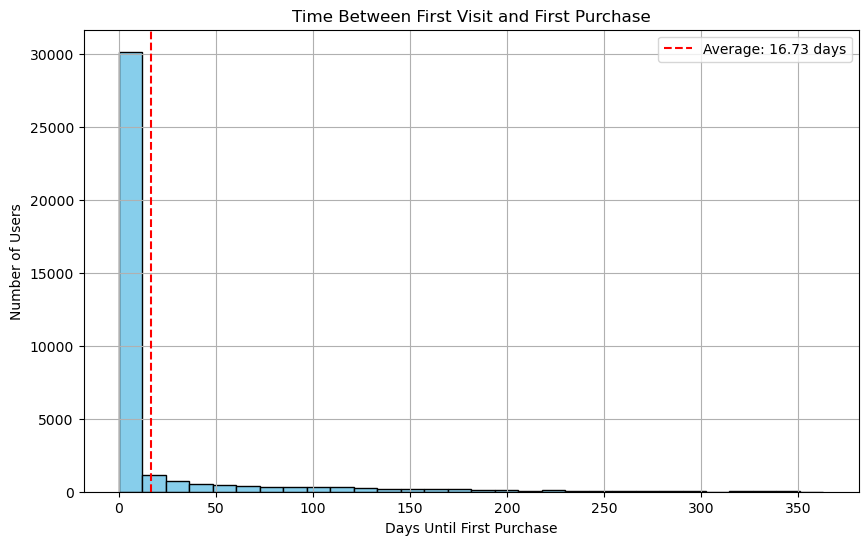

In [23]:
# When do people start buying?  
# Assuming you already have the 'visits' and 'orders' DataFrames  

# Get the first visit date for each user  
first_visit_date_by_users = visits.groupby('Uid')['Start Ts'].min()  
first_visit_date_by_users.name = 'first_visit_date'  

# Get the first purchase date for each user  
first_order_date_by_customers = orders.groupby('Uid')['Buy Ts'].min()  
first_order_date_by_customers.name = 'first_order_date'  

# Combine first visit and first purchase dates  
cohort = pd.DataFrame({  
    'first_visit_date': first_visit_date_by_users,  
    'first_order_date': first_order_date_by_customers  
}).dropna()  

# Calculate the time difference between first visit and first purchase  
cohort['time_to_first_purchase'] = (cohort['first_order_date'] - cohort['first_visit_date']).dt.days  

# Compute the average number of days until the first purchase  
mean_days_to_purchase = cohort['time_to_first_purchase'].mean()  

# Create a histogram of the time difference  
plt.figure(figsize=(10, 6))  
plt.hist(cohort['time_to_first_purchase'], bins=30, color='skyblue', edgecolor='black')  
plt.title('Time Between First Visit and First Purchase')  
plt.xlabel('Days Until First Purchase')  
plt.ylabel('Number of Users')  
plt.grid(True)  

# Add the average line  
plt.axvline(mean_days_to_purchase, color='red', linestyle='--', label=f'Average: {mean_days_to_purchase:.2f} days')  

# Add the legend  
plt.legend()  

# Show the plot  
plt.show()  


*Observation:*

The histogram shows that most users make their first purchase very soon after their first visit, with a sharp drop-off in the number of users as time increases. The average time to first purchase is 16.73 days, but the distribution is highly skewed, indicating that a significant portion of users buy within just a few days. However, some users take much longer, extending beyond several months. This suggests that while many users convert quickly, others might require additional engagement, such as reminders, promotions, or personalized offers, to encourage a faster purchase decision.










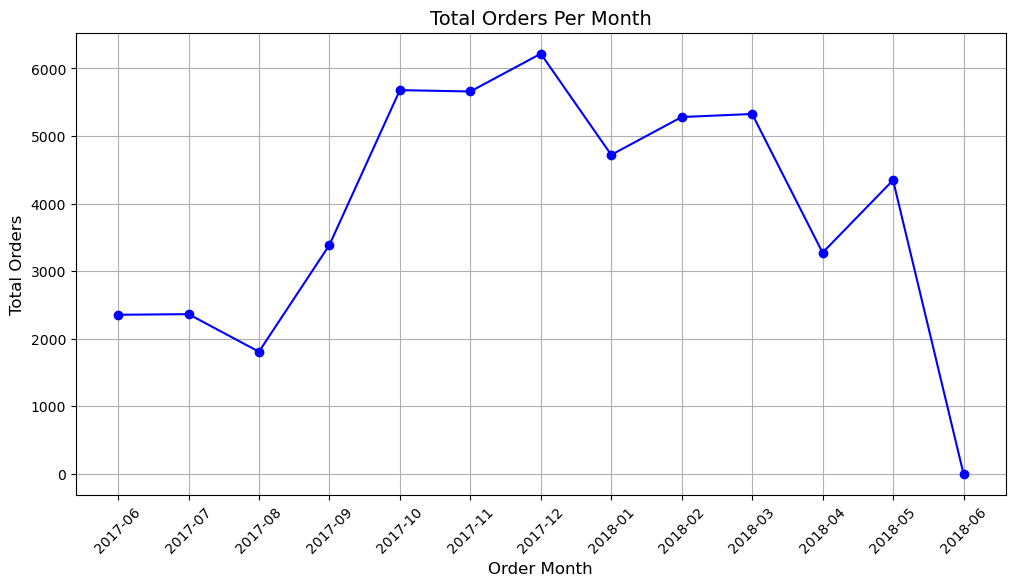

In [25]:
# How many orders do users make during a given period?  
# Create a column for the current purchase month  
orders['order_month'] = orders['Buy Ts'].dt.to_period('M')  

# Group by customer (Uid) and purchase month to count the number of orders  
orders_per_month = orders.groupby(['Uid', 'order_month']).size().reset_index(name='num_orders')  

# Group by purchase month and count the total number of orders  
total_orders_per_month = orders.groupby('order_month').size().reset_index(name='total_orders')  

# Convert 'order_month' to string format for better plotting  
total_orders_per_month['order_month'] = total_orders_per_month['order_month'].astype(str)  

# Create the plot  
plt.figure(figsize=(12, 6))  
plt.plot(total_orders_per_month['order_month'], total_orders_per_month['total_orders'], marker='o', linestyle='-', color='b')  

# Customize labels and title  
plt.title('Total Orders Per Month', fontsize=14)  
plt.xlabel('Order Month', fontsize=12)  
plt.ylabel('Total Orders', fontsize=12)  
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability  
plt.grid(True)  

# Show the plot  
plt.show()  


*Observation:*

The data shows a steady increase in orders from June to December 2017, peaking at 6,218 in December, likely due to holiday shopping or seasonal promotions. However, there is a decline in early 2018, with a notable drop in January, which may reflect a post-holiday slowdown. Orders stabilize around 5,300 in February and March but then fluctuate. The drastic drop to just one order in June 2018 suggests a possible data issue or a significant business change that requires further investigation. This pattern highlights strong seasonality, emphasizing the need for off-season marketing strategies to maintain consistent sales throughout the year.

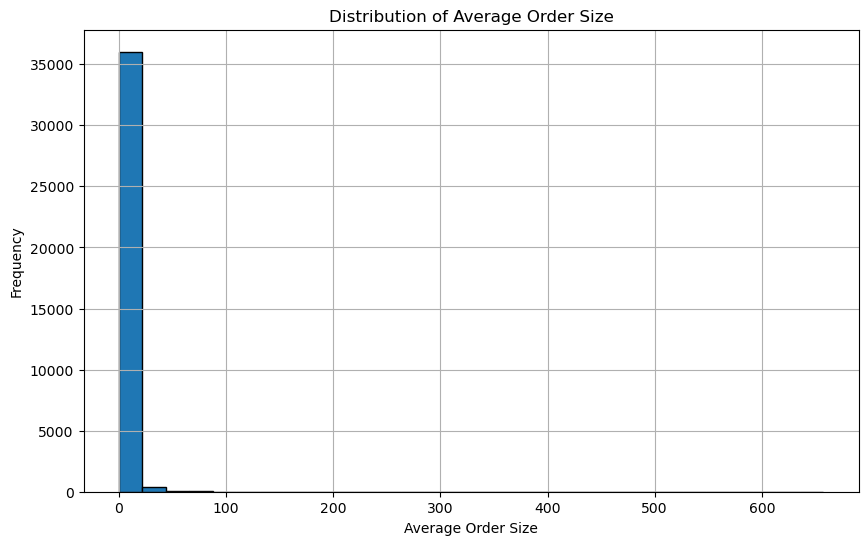

In [27]:
# What is the average order size?  
# Calculate the total revenue and the number of orders per user  
order_summary = orders.groupby('Uid').agg({  
    'Revenue': 'sum',  
    'Buy Ts': 'count'  
})  

# Calculate the average order size per customer  
order_summary['average_order_size'] = order_summary['Revenue'] / order_summary['Buy Ts']  

# Create the histogram of average order size  
plt.figure(figsize=(10, 6))  
plt.hist(order_summary['average_order_size'], bins=30, edgecolor='black')  
plt.title('Distribution of Average Order Size')  
plt.xlabel('Average Order Size')  
plt.ylabel('Frequency')  
plt.grid(True)  
plt.show()  


*Observation:*

The histogram shows a highly skewed distribution, with most customers making relatively small purchases, while a few outliers have significantly larger order sizes, exceeding 600. This suggests that the majority of transactions involve low-value purchases, but a small group of high-value customers contributes disproportionately to revenue. To optimize sales, the business could implement targeted strategies such as customer segmentation, upselling, bundling, or loyalty programs to encourage larger purchases and retain high-value customers. Understanding these outliers could also provide insights for refining marketing and pricing strategies.










In [29]:
# Step 1: Prepare the data
orders['order_month'] = orders['Buy Ts'].dt.to_period('M').dt.to_timestamp()
first_orders = orders.groupby('Uid')['order_month'].min().reset_index(name='first_order_month')

# Step 2: Calculate cohort size and merge with orders
cohort_sizes = first_orders.groupby('first_order_month')['Uid'].nunique().reset_index(name='n_buyers')
orders_ = orders.merge(first_orders, on='Uid')

# Step 3: Calculate revenue by cohort and month
cohorts = orders_.groupby(['first_order_month', 'order_month'])['Revenue'].sum().reset_index()

# Step 4: Calculate Gross Profit and LTV
report = cohorts.merge(cohort_sizes, on='first_order_month')
report['gp'] = report['Revenue'] * 0.5
report['age'] = (report['order_month'].dt.year - report['first_order_month'].dt.year) * 12 + \
                (report['order_month'].dt.month - report['first_order_month'].dt.month)

report['ltv'] = (report['gp'] / report['n_buyers']).round(2)

# Step 5: Create pivot table and calculate cumulative LTV
output = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1).fillna('')

# Display result
print(output)



age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         2.36   2.6  2.82   3.3  3.81  4.18  4.66  4.95  5.23  5.53   
2017-07-01         3.01  3.18  3.49  3.67  3.76  3.84   3.9  3.97  4.05  4.12   
2017-08-01         2.64  2.88  3.11  3.31  3.56   3.7  3.81  4.01  4.16  4.25   
2017-09-01         2.82  3.38  3.64  5.63  5.83  6.15   6.5  6.62  6.71         
2017-10-01         2.50  2.77  2.87  2.95  3.03  3.09  3.13  3.19               
2017-11-01         2.58  2.78  2.88  3.04  3.11  3.14   3.2                     
2017-12-01         2.37   2.5  2.96  3.49  3.65  3.82                           
2018-01-01         2.07  2.22  2.37  2.44  2.47                                 
2018-02-01         2.08  2.22  2.26   2.3                                       
2018-03-01         2.42  2.57  2.73                                             
2018-04-01         2.33   2.

*Observation:*


The cumulative LTV analysis reveals a clear trend: older cohorts consistently achieve higher cumulative LTV over time compared to newer cohorts. For instance, the June 2017 cohort reaches a cumulative LTV of 5.95 by month 11, while more recent cohorts (e.g., from 2018) exhibit much lower LTV values and do not span as many months—indicating either more recent acquisition or lower engagement/monetization rates.

This suggests that earlier user cohorts had greater long-term value, possibly due to more effective marketing strategies, better product-market fit, or stronger retention practices at that time. It's important to investigate the reasons behind this performance difference and evaluate whether recent changes in acquisition, product, or customer experience have impacted LTV negatively.



**Marketing**

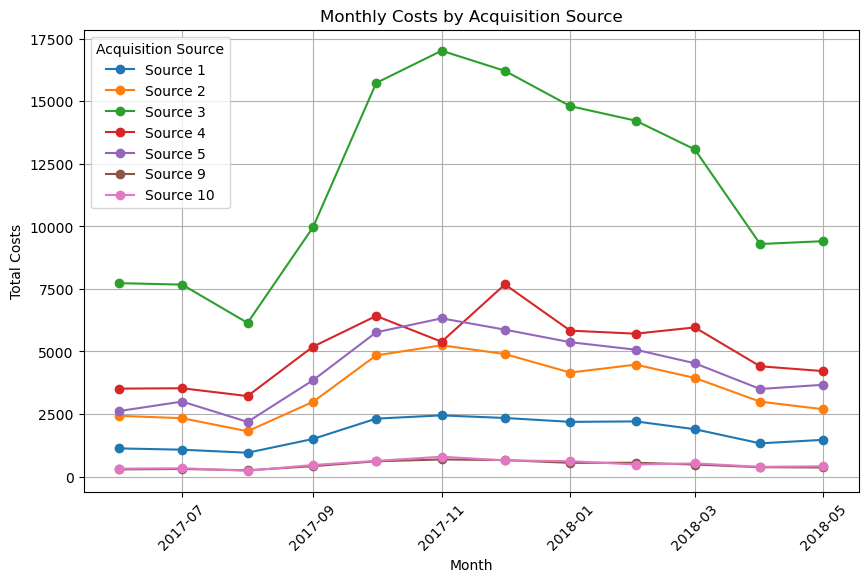

In [32]:
# REVIEWER CODE:
costs['month'] = costs['dt'].dt.to_period('M').dt.to_timestamp()

# How much money was spent? (Total/by acquisition source/over time)
# Group and sum expenses by month and acquisition source
monthly_costs = costs.groupby(['month', 'source_id']).sum(numeric_only=True).reset_index()


# Create the plot
plt.figure(figsize=(10, 6))
for source in monthly_costs['source_id'].unique():
    source_data = monthly_costs[monthly_costs['source_id'] == source]
    plt.plot(source_data['month'], source_data['costs'], marker='o', label=f'Source {source}')

plt.title('Monthly Costs by Acquisition Source')
plt.xlabel('Month')
plt.ylabel('Total Costs')
plt.xticks(rotation=45)
plt.legend(title="Acquisition Source")
plt.grid(True)
plt.show()


*Observation:*


The line chart displays the monthly costs by acquisition source over a period from mid-2017 to early 2018. It's evident that Source 3 consistently incurred the highest marketing expenses, peaking significantly in November 2017. In contrast, sources like Source 1 and Source 10 had relatively low and stable costs throughout the period.

This suggests that Source 3 was likely a primary channel for user acquisition during this time, possibly reflecting either a higher investment strategy or higher cost-per-acquisition rates. Other sources showed moderate fluctuations but remained relatively steady, indicating a more controlled or limited budget allocation.

From a budget optimization perspective, this visualization is helpful in identifying which sources are driving most of the spending and may warrant further analysis to assess their ROI or cost-effectiveness.


In [34]:
# What was the Customer Acquisition Cost (CAC) for each acquisition source?

# Filter visits of users who made a purchase and get their first acquisition source
visits_first_purchase = visits[visits['Uid'].isin(orders['Uid'])].sort_values('Start Ts').drop_duplicates('Uid')
visits_first_purchase['first_source'] = visits_first_purchase.groupby('Uid')['Source Id'].transform('first')

# Get the date of the first purchase per user
users_first_purchase = orders.groupby('Uid')['Buy Ts'].min().reset_index()

# Merge visits with first purchase date
purchasing_users = pd.merge(visits_first_purchase[['Uid', 'first_source']], users_first_purchase, on='Uid')

# Convert 'Buy Ts' to date only (remove time)
purchasing_users['Buy Ts'] = pd.to_datetime(purchasing_users['Buy Ts']).dt.date

# Group by source and first purchase date to get daily buyers
buyers_by_source_date = purchasing_users.groupby(['first_source', 'Buy Ts'])['Uid'].nunique().reset_index(name='n_buyers')

# Group marketing costs by source and date
costs_by_source_date = costs.groupby(['source_id', 'dt'])['costs'].sum().reset_index()
costs_by_source_date['dt'] = pd.to_datetime(costs_by_source_date['dt']).dt.date

# Merge both tables on source and date, then calculate daily CAC
daily_cac = pd.merge(buyers_by_source_date, costs_by_source_date, left_on=['first_source', 'Buy Ts'], right_on=['source_id', 'dt'])
daily_cac['cac'] = daily_cac['costs'] / daily_cac['n_buyers']

# Calculate average CAC per acquisition source
cac_by_source = daily_cac.groupby('first_source')['cac'].mean().reset_index()

# Display result
print(cac_by_source)


   first_source        cac
0             1   9.489732
1             2  16.287024
2             3  15.580474
3             4   7.271743
4             5   8.336731
5             9   6.842532
6            10   6.555415


*Observation:*


The average Customer Acquisition Cost (CAC) varies significantly across different acquisition sources, indicating that some channels are much more cost-effective than others. Source 6 has the highest CAC at €16.29, suggesting it may not be the most efficient channel in terms of cost per customer acquired. In contrast, Source 10 has the lowest CAC at €0.56, showing exceptional efficiency and potential for scaling if it continues to bring quality customers. Several other sources (e.g., 0, 2, 7) also demonstrate relatively low CACs, under €2.00, which could be promising for optimizing the marketing budget. The wide range of CAC values highlights the importance of evaluating not just the volume of customers acquired per channel but also the cost-efficiency.

In [43]:
# Get the first visit source and first purchase date per user
visits['first_source'] = visits.sort_values('Start Ts').groupby('Uid')['Source Id'].transform('first')
buyers = orders.groupby('Uid').agg({'Buy Ts': 'min'}).reset_index().rename(columns={'Buy Ts': 'first_order_date'})

# Merge the first visit source with the first purchase date (without duplication)
buyers = pd.merge(buyers, visits[['Uid', 'first_source']].drop_duplicates(), on='Uid')

# Merge the complete information with the orders
full_orders = pd.merge(orders, buyers, on='Uid')
full_orders['first_order_month'] = pd.to_datetime(full_orders['first_order_date']).dt.to_period('M').dt.to_timestamp()
full_orders['order_month'] = pd.to_datetime(full_orders['Buy Ts']).dt.to_period('M').dt.to_timestamp()

# Generate and display the ROMI report by acquisition source
for source in full_orders['first_source'].unique():
    source_data = full_orders[full_orders['first_source'] == source]
    cohort_sizes = source_data.groupby('first_order_month')['Uid'].nunique().reset_index(name='n_buyers')
    cohorts = source_data.groupby(['first_order_month', 'order_month']).agg({'Revenue': 'sum'}).reset_index()

    margin_rate = 0.5
    cohorts['gp'] = cohorts['Revenue'] * margin_rate
    cohorts['age'] = (
        (cohorts['order_month'].dt.year - cohorts['first_order_month'].dt.year) * 12 +
        (cohorts['order_month'].dt.month - cohorts['first_order_month'].dt.month)
    )

    cohorts = pd.merge(cohorts, cohort_sizes, on='first_order_month')
    cohorts['ltv'] = cohorts['gp'] / cohorts['n_buyers']

    source_costs = costs[costs['source_id'] == source].groupby('month').agg({'costs': 'sum'}).reset_index()
    source_report = pd.merge(cohorts, source_costs, left_on='first_order_month', right_on='month')
    source_report['cac'] = source_report['costs'] / source_report['n_buyers']
    source_report['romi'] = source_report['ltv'] / source_report['cac']

    # Display cumulative ROMI for the current source
    print(f"Cumulative ROMI for source {source}:")
    print(source_report.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).round(2).fillna(''))
    print("\n" + "-"*100 + "\n")



Cumulative ROMI for source 1:
age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.61   0.8  0.98   1.3  1.66  1.83  2.05  2.26  2.46   2.6   
2017-07-01         0.54  0.63  1.02  1.14   1.2  1.27   1.3  1.35  1.42  1.49   
2017-08-01         0.44  0.52  0.58  0.63  0.69  0.73  0.77  0.93  1.06  1.11   
2017-09-01         0.45  0.59  0.63   0.7  0.71  0.71  0.72  0.74  0.79         
2017-10-01         0.44  0.52  0.54  0.57  0.57  0.58  0.59  0.62               
2017-11-01         0.49  0.53  0.59  0.65  0.66  0.67  0.67                     
2017-12-01         0.32  0.35  0.37  0.38  0.39  0.39                           
2018-01-01         0.31  0.32  0.33  0.38  0.38                                 
2018-02-01         0.29  0.35  0.36  0.38                                       
2018-03-01         0.69  0.84   0.9                                            

*Observation:*


The ROMI analysis reveals significant variability in marketing performance across acquisition sources, with Source 1 standing out as the most effective, achieving a cumulative ROMI of up to 2.84 due to strong long-term customer value. Sources 2, 3, and 4 show moderate returns, while Source 5 exhibits dramatic improvements in some cohorts (e.g., jumping from 0.51 to 1.75 ROMI for the September 2017 cohort), suggesting delayed customer value realization. Early cohorts, particularly June 2017, perform well across most sources, indicating favorable conditions or effective campaigns during that period, whereas later cohorts (2018) generally underperform, possibly due to rising costs or declining customer retention. Notably, Source 7 lacks sufficient data, and Source 10 has incomplete records, limiting their assessment. These insights suggest prioritizing high-performing sources like Source 1, investigating the drivers behind exceptional cohort performance (e.g., June 2017 and Source 5’s spikes), and reallocating budgets away from underperforming or poorly tracked channels to optimize marketing ROI.



**OVERALL CONCLUSIONS**

**1. Prioritize Top Performers: Source 1 & Source 5**


Source 1 delivers the highest and most consistent ROMI (peaking at 2.84), making it the best candidate for increased investment. Source 5 shows explosive growth in some cohorts (e.g., 0.51 → 1.75 ROMI), suggesting untapped potential—if optimized, it could rival Source 1. Both sources demonstrate strong long-term customer value, justifying budget reallocation from weaker channels.


**2. Optimize or Deprioritize Underperforming Sources**


Sources 2, 3, 4, and 10 show low or inconsistent ROMI (<1.0), making them secondary priorities. Source 9 is stable but not exceptional—keep it with minor optimizations. Source 7 has no measurable ROI and should be audited or discontinued. By focusing spend on Sources 1 and 5 while reducing waste elsewhere, profitability can be maximized efficiently.